In [2]:
!pip install nltk
!pip install wordcloud
!pip install spacy
!python -m spacy download pt_core_news_sm

import nltk
nltk.download('stopwords')
nltk.download('rslp')
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import ToktokTokenizer
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.stem import RSLPStemmer
import spacy
nlp = spacy.load("pt_core_news_sm")

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
/bin/sh: 1: python: not found


[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /home/ubuntu/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


OSError: [E050] Can't find model 'pt_core_news_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [2]:
# Texto de exemplo
texto = """A mineração de texto é uma técnica de processamento de linguagem natural
que permite extrair informações valiosas a partir de grandes volumes de textos."""

# Convertendo para minúsculas e separando as palavras usando 'split' e 'isalnum' para limpar
palavras = [palavra for palavra in texto.lower().split() if palavra.isalnum()]

# Contar a frequência das palavras
frequencia = Counter(palavras)

# Exibir as palavras mais comuns
print(frequencia.most_common(5))

[('de', 5), ('a', 2), ('mineração', 1), ('texto', 1), ('é', 1)]


In [3]:
stopwords.words('portuguese')

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

In [4]:
# Texto de exemplo
texto = """A mineração de texto é uma técnica de processamento de linguagem natural
que permite extrair informações valiosas a partir de grandes volumes de textos."""

# Tokenização usando ToktokTokenizer
tokenizer = ToktokTokenizer()
tokens = tokenizer.tokenize(texto)
print("Tokens:", tokens)

# Contagem de frequência dos tokens
frequencia = Counter(tokens)
print()
print(frequencia.most_common(5))


Tokens: ['A', 'mineração', 'de', 'texto', 'é', 'uma', 'técnica', 'de', 'processamento', 'de', 'linguagem', 'natural', 'que', 'permite', 'extrair', 'informações', 'valiosas', 'a', 'partir', 'de', 'grandes', 'volumes', 'de', 'textos', '.']

[('de', 5), ('A', 1), ('mineração', 1), ('texto', 1), ('é', 1)]


In [5]:
# Texto de exemplo
texto = """A mineração de texto é uma técnica de processamento de linguagem natural
que permite extrair informações valiosas a partir de grandes volumes de textos."""

# Tokenização usando ToktokTokenizer
tokenizer = ToktokTokenizer()
tokens = tokenizer.tokenize(texto)
print("Tokens:", tokens)

# Obtendo stopwords do idioma português
stopwords_portugues = set(stopwords.words('portuguese'))

# Filtrando tokens que não estão na lista de stopwords (comparando em minúsculas)
tokens_filtrados = [token for token in tokens if token.lower() not in stopwords_portugues]
print("\nTokens após remoção de stopwords:", tokens_filtrados)

# Contagem de frequência dos tokens filtrados
frequencia_filtrada = Counter(tokens_filtrados)
print("\nPalavras (sem stopwords):", frequencia_filtrada.most_common(5))


Tokens: ['A', 'mineração', 'de', 'texto', 'é', 'uma', 'técnica', 'de', 'processamento', 'de', 'linguagem', 'natural', 'que', 'permite', 'extrair', 'informações', 'valiosas', 'a', 'partir', 'de', 'grandes', 'volumes', 'de', 'textos', '.']

Tokens após remoção de stopwords: ['mineração', 'texto', 'técnica', 'processamento', 'linguagem', 'natural', 'permite', 'extrair', 'informações', 'valiosas', 'partir', 'grandes', 'volumes', 'textos', '.']

Palavras (sem stopwords): [('mineração', 1), ('texto', 1), ('técnica', 1), ('processamento', 1), ('linguagem', 1)]


In [6]:
df = pd.read_csv('depoimentos.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          100 non-null    int64 
 1   data        100 non-null    object
 2   depoimento  100 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.5+ KB


In [7]:
df.sample(3)

,id,data,depoimento
96,97,2023-04-07,O restaurante surpreende com sua criatividade ...
36,37,2023-02-06,A experiência no restaurante foi muito positiv...
52,53,2023-02-22,"Equipe excelente, mas o preparo dos pratos é l..."


In [8]:
tokenizer = ToktokTokenizer()
stopwords_portugues = set(stopwords.words('portuguese'))

# Lista para armazenar os tokens de todos os depoimentos
tokens_totais = []

# Iterar sobre cada depoimento
for depoimento in df['depoimento']:
    # Tokenização do depoimento
    tokens = tokenizer.tokenize(depoimento)
    # Converter para minúsculas e filtrar tokens:
    #  - Remover stopwords
    #  - Manter apenas tokens que contenham apenas letras (ignora números e pontuações)
    tokens_filtrados = [token.lower() for token in tokens
                         if token.lower() not in stopwords_portugues and token.isalpha()]
    tokens_totais.extend(tokens_filtrados)

# Contar a frequência dos tokens
frequencia = Counter(tokens_totais)

# Exibir as 20 palavras mais comuns
top_10 = frequencia.most_common(20)
print(top_10)

[('pratos', 43), ('atendimento', 40), ('serviço', 22), ('preparo', 19), ('comida', 18), ('experiência', 16), ('ambiente', 15), ('qualidade', 15), ('restaurante', 15), ('tempo', 14), ('excelente', 12), ('agradável', 12), ('demora', 12), ('bem', 10), ('bom', 9), ('cordial', 8), ('servidos', 7), ('equipe', 6), ('ótimo', 6), ('sabor', 6)]


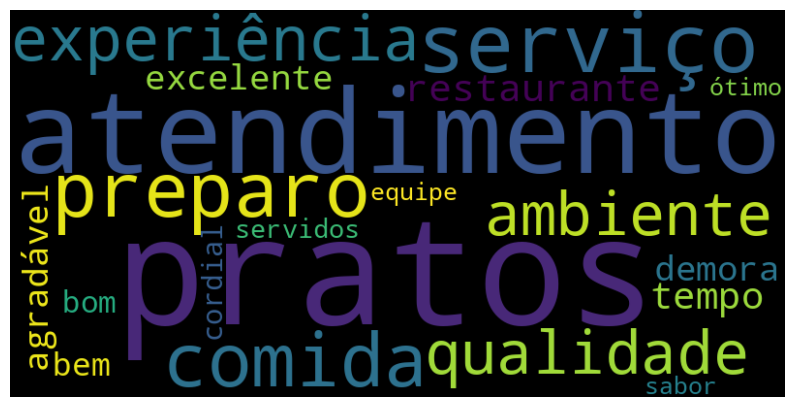

In [11]:
# Considerando que a variável 'frequencia' é um objeto Counter
# com os tokens e suas respectivas frequências. Se desejar usar apenas os top 10:
top_20 = dict(frequencia.most_common(20))

# Gerar a nuvem de palavras com os top 20
wordcloud = WordCloud(width=800, height=400, background_color='black', random_state=100).generate_from_frequencies(top_20)

# Exibir a nuvem de palavras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [12]:
from nltk.stem import RSLPStemmer

# Inicializa o stemmer para português
stemmer = RSLPStemmer()

# Dicionário para armazenar o stem e a contagem agregada
stemmed_counts = {}

for word, count in top_20.items():
    # Aplica o stemming na palavra
    stem = stemmer.stem(word)
    # Agrega a contagem para o stem correspondente
    stemmed_counts[stem] = stemmed_counts.get(stem, 0) + count

print(stemmed_counts)


{'prat': 43, 'atend': 40, 'serviç': 22, 'prepar': 19, 'com': 18, 'experi': 16, 'ambi': 15, 'qual': 15, 'restaurant': 15, 'temp': 14, 'excel': 12, 'agrad': 12, 'dem': 12, 'bem': 10, 'bom': 9, 'cord': 8, 'serv': 7, 'equip': 6, 'ótim': 6, 'sab': 6}


In [13]:
# Dicionário para armazenar os lemas e a contagem agregada
lemmatized_counts = {}

# Itera sobre as palavras do dicionário
for word, count in top_20.items():
    # Processa a palavra com o spaCy
    doc = nlp(word)
    # Como estamos processando uma única palavra, pegamos o lema do primeiro token
    lemma = doc[0].lemma_
    # Agrega a contagem para o lema correspondente
    lemmatized_counts[lemma] = lemmatized_counts.get(lemma, 0) + count

print(lemmatized_counts)

{'prato': 43, 'atendimento': 40, 'serviço': 22, 'preparo': 19, 'comida': 18, 'experiência': 16, 'ambiente': 15, 'qualidade': 15, 'restaurante': 15, 'tempo': 14, 'excelente': 12, 'agradável': 12, 'demor': 12, 'bem': 10, 'bom': 15, 'cordial': 8, 'servir': 7, 'equipe': 6, 'sabor': 6}


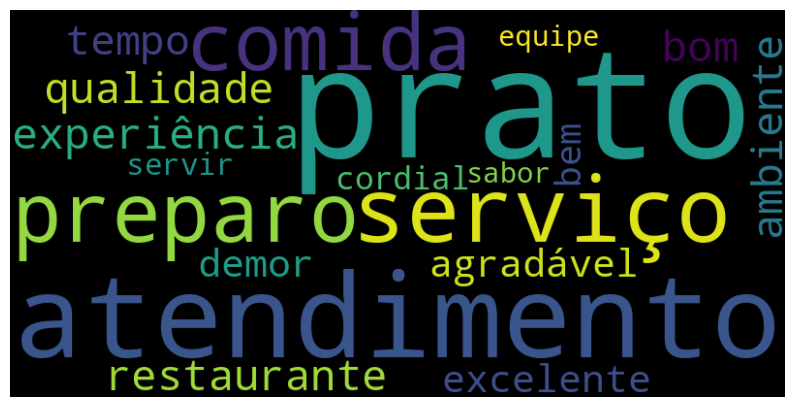

In [16]:
wordcloud = WordCloud(width=800, height=400, background_color='black', random_state=100).generate_from_frequencies(lemmatized_counts)

# Exibir a nuvem de palavras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [17]:
lemmatized_counts = {}
# Dicionário customizado para corrigir lemas problemáticos
custom_lemmas = {
    "demora": "demora"
}

for word, count in top_20.items():
    if word in custom_lemmas:
        lemma = custom_lemmas[word]
    else:
        doc = nlp(word)
        lemma = doc[0].lemma_
    lemmatized_counts[lemma] = lemmatized_counts.get(lemma, 0) + count

print(lemmatized_counts)

{'prato': 43, 'atendimento': 40, 'serviço': 22, 'preparo': 19, 'comida': 18, 'experiência': 16, 'ambiente': 15, 'qualidade': 15, 'restaurante': 15, 'tempo': 14, 'excelente': 12, 'agradável': 12, 'demora': 12, 'bem': 10, 'bom': 15, 'cordial': 8, 'servir': 7, 'equipe': 6, 'sabor': 6}


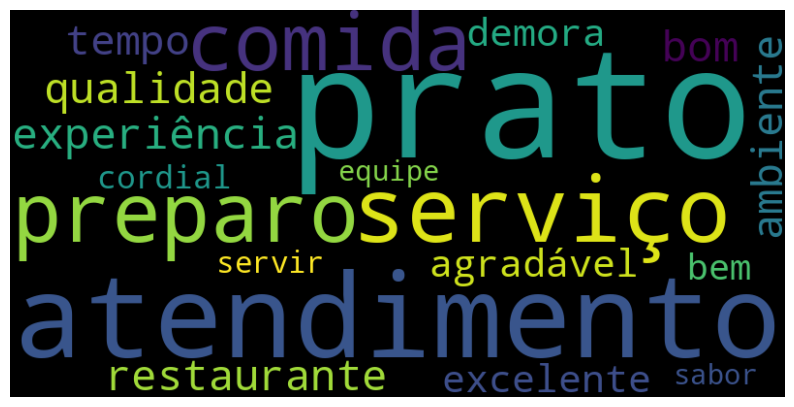

In [18]:
wordcloud = WordCloud(width=800, height=400, background_color='black', random_state=100).generate_from_frequencies(lemmatized_counts)

# Exibir a nuvem de palavras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()